In [1]:
#NUMBER RECOGNITION

In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data('digits')

11490434/11490434 [==============================] - 4s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

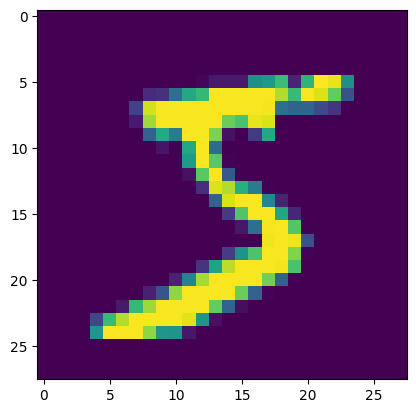

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()   

In [9]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

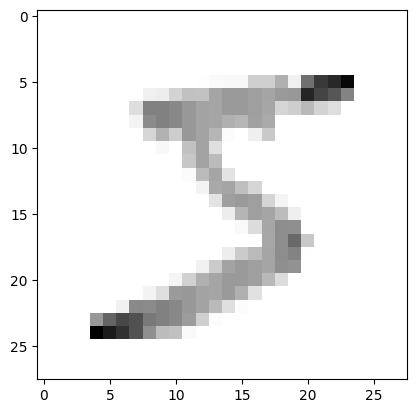

In [10]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
print(y_train[0])

5


In [13]:
import numpy as np
i=28
x_trainr=np.array(x_train).reshape(-1,i,i,1)
x_testr=np.array(x_test).reshape(-1,i,i,1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))
     

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [17]:
print("Total Training Samples=",len(x_trainr))

Total Training Samples= 60000


In [18]:
from keras.api._v2.keras import metrics
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [19]:
hist=model.fit(x_trainr,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 112s 71ms/step - loss: 0.2228 - accuracy: 0.9302 - val_loss: 0.0997 - val_accuracy: 0.9690
Epoch 2/10
1500/1500 [==============================] - 113s 75ms/step - loss: 0.0681 - accuracy: 0.9784 - val_loss: 0.0569 - val_accuracy: 0.9827
Epoch 3/10
1500/1500 [==============================] - 114s 76ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0478 - val_accuracy: 0.9862
Epoch 4/10
1500/1500 [==============================] - 113s 75ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0461 - val_accuracy: 0.9869
Epoch 5/10
1500/1500 [==============================] - 112s 74ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0466 - val_accuracy: 0.9864
Epoch 6/10
1500/1500 [==============================] - 115s 77ms/step - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0664 - val_accuracy: 0.9807
Epoch 7/10
1500/1500 [==============================] - 117s 78ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0

In [20]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
hist.history

{'loss': [0.2228110134601593,
  0.06814002245664597,
  0.04656528681516647,
  0.03696141391992569,
  0.026653602719306946,
  0.021587394177913666,
  0.017593292519450188,
  0.014668719843029976,
  0.011851854622364044,
  0.010915652848780155],
 'accuracy': [0.9302499890327454,
  0.9783958196640015,
  0.9853958487510681,
  0.9883541464805603,
  0.9912291765213013,
  0.9926666617393494,
  0.9942291378974915,
  0.9950416684150696,
  0.9962708353996277,
  0.9963333606719971],
 'val_loss': [0.09974347054958344,
  0.056874241679906845,
  0.04784147068858147,
  0.04609346389770508,
  0.04656149446964264,
  0.06638839840888977,
  0.05362863093614578,
  0.04735633730888367,
  0.04809471592307091,
  0.048181042075157166],
 'val_accuracy': [0.968999981880188,
  0.9827499985694885,
  0.9861666560173035,
  0.9869166612625122,
  0.9864166378974915,
  0.9806666374206543,
  0.9850833415985107,
  0.9861666560173035,
  0.9888333082199097,
  0.9892500042915344]}

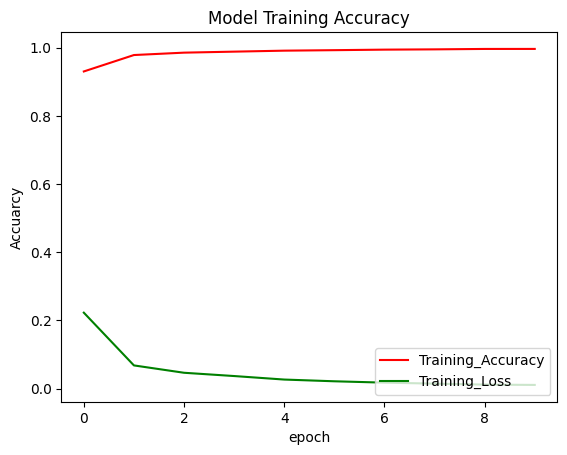

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],'-r',label='Training_Accuracy')
plt.plot(hist.history['loss'],'-g',label='Training_Loss')

plt.title('Model Training Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()